## 7.1 Test on Regular Season Dataset

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import calibration_curve, CalibrationDisplay
import joblib
from plot_metrics import *
from matplotlib.gridspec import GridSpec

In [2]:
# Read in data and assign X and y
#data = pd.read_csv('../data/test_playoff.csv', index_col=0)
data = pd.read_csv('../data/test_regular.csv', index_col=0)
data

,time,period,coordinateX,coordinateY,shotDistance,shotAngle,shotType,emptyNet,lastEventType,lastCoordinateX,lastCoordinateY,lastTime,lastShotDistance,rebound,changeShotAngle,speed,friendlyPlayersOnIce,opposingPlayersOnIce,timeSincePP,isGoal
gameId,,,,,,,,,,,,,,,,,,,,
2019020001,25,1,85.0,-1.0,4.1231,-14.0362,4,0,1,0.0,0.0,25,85.0059,0,0.0000,3.4002,5,5,0,1
2019020001,91,1,-32.0,-2.0,57.0351,-2.0096,3,0,3,-36.0,-31.0,27,29.2746,0,0.0000,1.0842,5,4,35,0
2019020001,203,1,63.0,-6.0,26.6833,-12.9946,3,0,6,-64.0,-4.0,14,127.0157,0,0.0000,9.0726,5,5,0,0
2019020001,236,1,-59.0,-20.0,36.0555,-33.6901,6,0,14,34.0,-20.0,6,93.0000,0,0.0000,15.5000,5,5,0,0
2019020001,287,1,-42.0,-29.0,55.2268,-31.6755,2,0,6,-86.0,4.0,6,55.0000,0,0.0000,9.1667,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019021082,3405,3,77.0,-23.0,25.9422,-62.4472,0,0,0,-72.0,-21.0,21,149.0134,0,0.0000,7.0959,5,5,0,0
2019021082,3440,3,-76.0,38.0,40.1622,71.1139,2,0,5,-95.0,-17.0,16,58.1893,0,0.0000,3.6368,5,5,0,0
2019021082,3442,3,-79.0,10.0,14.1421,45.0000,0,0,12,-76.0,38.0,2,28.1603,1,-26.1139,14.0802,5,5,0,0


In [3]:
X_test = data[data.columns.tolist()[:-1]]
y_test = data[['isGoal']]
X_test

,time,period,coordinateX,coordinateY,shotDistance,shotAngle,shotType,emptyNet,lastEventType,lastCoordinateX,lastCoordinateY,lastTime,lastShotDistance,rebound,changeShotAngle,speed,friendlyPlayersOnIce,opposingPlayersOnIce,timeSincePP
gameId,,,,,,,,,,,,,,,,,,,
2019020001,25,1,85.0,-1.0,4.1231,-14.0362,4,0,1,0.0,0.0,25,85.0059,0,0.0000,3.4002,5,5,0
2019020001,91,1,-32.0,-2.0,57.0351,-2.0096,3,0,3,-36.0,-31.0,27,29.2746,0,0.0000,1.0842,5,4,35
2019020001,203,1,63.0,-6.0,26.6833,-12.9946,3,0,6,-64.0,-4.0,14,127.0157,0,0.0000,9.0726,5,5,0
2019020001,236,1,-59.0,-20.0,36.0555,-33.6901,6,0,14,34.0,-20.0,6,93.0000,0,0.0000,15.5000,5,5,0
2019020001,287,1,-42.0,-29.0,55.2268,-31.6755,2,0,6,-86.0,4.0,6,55.0000,0,0.0000,9.1667,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019021082,3405,3,77.0,-23.0,25.9422,-62.4472,0,0,0,-72.0,-21.0,21,149.0134,0,0.0000,7.0959,5,5,0
2019021082,3440,3,-76.0,38.0,40.1622,71.1139,2,0,5,-95.0,-17.0,16,58.1893,0,0.0000,3.6368,5,5,0
2019021082,3442,3,-79.0,10.0,14.1421,45.0000,0,0,12,-76.0,38.0,2,28.1603,1,-26.1139,14.0802,5,5,0


In [4]:
y_test = data[['isGoal']]
y_test

,isGoal
gameId,
2019020001,1
2019020001,0
2019020001,0
2019020001,0
2019020001,0
...,...
2019021082,0
2019021082,0
2019021082,0


In [5]:
def pred_model(X_test, y_test, model):
    if model == 'LR_D':
        best_model = joblib.load("log_reg_basemodel_distance.pkl")
        X_test = X_test.rename({'shotDistance': 'distanceFromNet', 'shotAngle': 'angleFromNet'}, axis=1)
        X_test = X_test[['distanceFromNet']]
        
    elif model == 'LR_A':
        best_model = joblib.load("log_reg_basemodel_angle.pkl")
        X_test = X_test.rename({'shotDistance': 'distanceFromNet', 'shotAngle': 'angleFromNet'}, axis=1)
        X_test = X_test[['angleFromNet']]
        
    elif model == 'LR_DA':
        best_model = joblib.load("log_reg_basemodel_distance_angle.pkl")
        X_test = X_test.rename({'shotDistance': 'distanceFromNet', 'shotAngle': 'angleFromNet'}, axis=1)
        X_test = X_test[['distanceFromNet', 'angleFromNet']]
        
    elif model == 'XGB':
        best_model = joblib.load("xgb_all_features_grid_search1.pkl")
       
    elif model == 'RF':
        best_model = joblib.load("rf_random_best_model.pkl")
        
    elif model == 'DT':
        best_model = joblib.load("dt_random_best_model.pkl")
        
    else:
        pass 
    
    y_pred = best_model.predict(X_test)
    
    #Probability estimates
    pred_probs = best_model.predict_proba(X_test)
    probs_isgoal = pred_probs[:,1]
    
    #Model Evaultion Metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    #precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    cf_matrix = metrics.confusion_matrix(y_test,y_pred)
    roc_auc = metrics.roc_auc_score(y_test,probs_isgoal)
    
    #print(f' accuracy: {accuracy}')
    #print(f' f1_score: {f1_score}')
    #print(f' precision: {precision}')
    #print(f' recall: {recall}')
    #print(f' roc_auc: {roc_auc}')
    #print('Confusion Matrix')
    #print(cf_matrix)
    
                                
    return y_test, y_pred, accuracy, pred_probs

In [6]:
def plot_roc_all_feat(X_test, y_test):

    fig = plt.figure(figsize=(12,10))
    
    model_list = ['LR_D', 'LR_A', 'LR_DA', 'XGB', 'RF', 'DT'] 
    model_color_list = ['red', 'blue', 'green', 'magenta', 'brown', 'cyan']
    #plot_label_list = ['LR_Distance', 'LR_AngleAngle from Net', 'Distance and Angle from Net', ]
    
    for i, model in enumerate(model_list):
        
        y_test, y_pred, accuracy,  pred_probs = pred_model(X_test, y_test, model)
        
        probs_isgoal = pred_probs[:,1]
        fpr, tpr, _ = roc_curve(y_test,probs_isgoal)
        roc_auc = auc(fpr,tpr)
        
            
        plot_color = model_color_list[i]
        plot_label = model_list[i]

            
        plt.plot(fpr, tpr, color = plot_color, label = f'{plot_label} '+'AUC = %0.2f' % roc_auc, lw=2)               
    
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    
    plt.title('ROC Curves', fontsize=20)
    plt.legend(loc=2,prop={'size': 16})
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)    
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'7-1-1a_ROC_curves.png')
    plt.show()

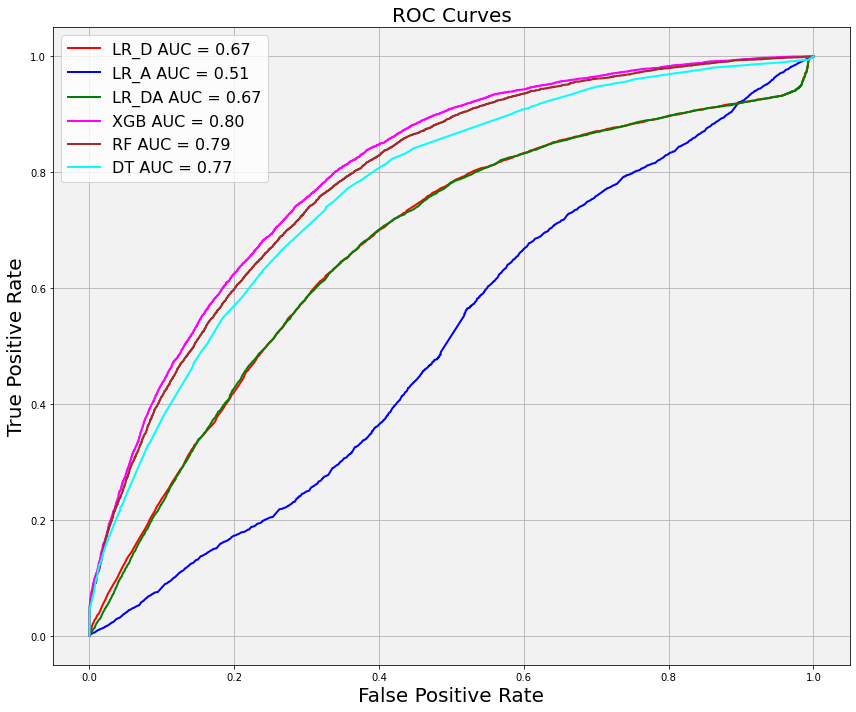

In [7]:
 plot_roc_all_feat(X_test, y_test)

In [8]:
def plot_goal_rate_all_feat(X_test, y_test):  
    fig = plt.figure(figsize=(12,10))
    model_list = ['LR_D', 'LR_A', 'LR_DA', 'XGB', 'RF', 'DT'] 
    model_color_list = ['red', 'blue', 'green', 'magenta', 'brown', 'cyan']
    
    for i, model in enumerate(model_list):
        
        y_test, y_pred, accuracy,  pred_probs = pred_model(X_test, y_test, model) 
            
        plot_color = model_color_list[i]
        plot_label = model_list[i]
            
        df_percentile =  calc_percentile(pred_probs, y_test)
        goal_rate_df = goal_rate(df_percentile)
        goal_rate_x = goal_rate_df['Percentile']
        goal_rate_y = goal_rate_df['Rate']
        plt.plot(goal_rate_x,goal_rate_y, color = plot_color, label = f'{plot_label}' )
                 
       
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    
    ax.set_ylim([0,100])
    ax.set_xlim([0,100])
    ax.invert_xaxis()
    major_ticks = np.arange(0, 110, 10)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    
    plt.grid(True)
    plt.title('Goal Rate', fontsize=20)
    plt.xlabel('Shot probability model percentile', fontsize=16)
    plt.ylabel('Goals / (Shots+Goals)%', fontsize=16)
    plt.legend(loc=2,prop={'size': 16})
    plt.tight_layout()
    plt.savefig(f'7-1-1b_goal_rates.png')
    plt.show()

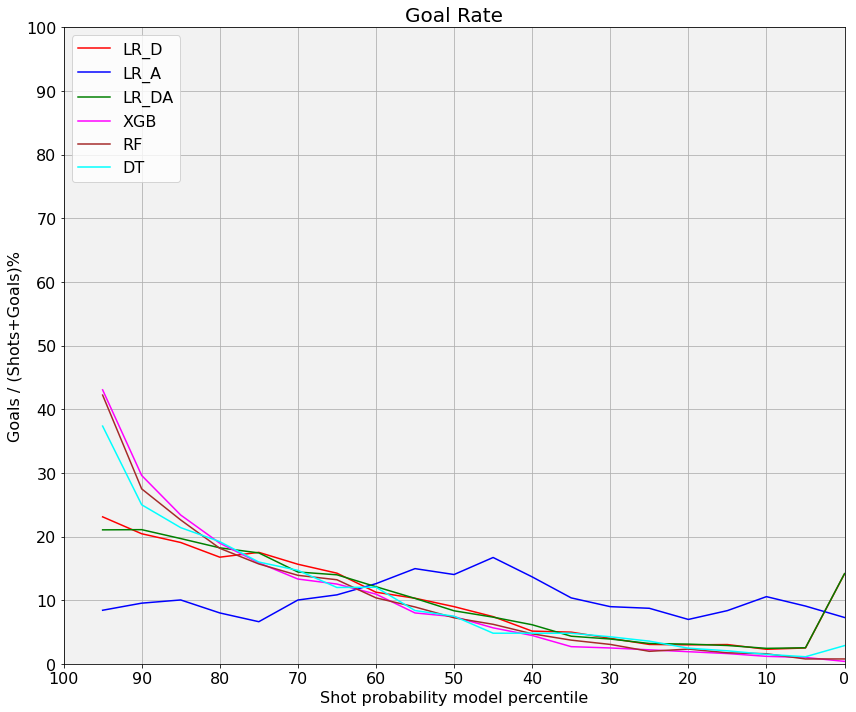

In [9]:
plot_goal_rate_all_feat(X_test, y_test)

In [10]:
def plot_cumulative_rate_all_feat(X_test, y_test):

    fig = plt.figure(figsize=(12,10))
    model_list = ['LR_D', 'LR_A', 'LR_DA', 'XGB', 'RF', 'DT'] 
    model_color_list = ['red', 'blue', 'green', 'magenta', 'brown', 'cyan']
    
    for i, model in enumerate(model_list):
        
        y_test, y_pred, accuracy,  pred_probs = pred_model(X_test, y_test, model) 
            
        plot_color = model_color_list[i]
        plot_label = model_list[i]
            
        df_percentile =  calc_percentile(pred_probs, y_test)
        df_precentile_only_goal = df_percentile[df_percentile['isGoal'] == 1]
        ax = sns.ecdfplot(data=df_precentile_only_goal, x=100 - df_precentile_only_goal.Percentile, 
                              color=plot_color)
            
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    plt.yticks(np.arange(0, 1.05, 0.1))
    plt.xticks(np.arange(0, 100 * 1.01, 10))
    xvals = ax.get_xticks()
    ax.set_xticklabels(100 - xvals.astype(np.int32), fontsize=16)
    yvals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in yvals], fontsize=16)
    ax.set_xlabel('Shot probability model percentile', fontsize=16)
    ax.set_ylabel('Proportion', fontsize=16)
    ax.set_title(f"Cumulative % of Goals", fontsize=20)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
    
    plt.legend(labels=model_list, fontsize=16)
    plt.tight_layout()
    plt.savefig(f'7-1-1c_goal_proportions.png')
    plt.show()

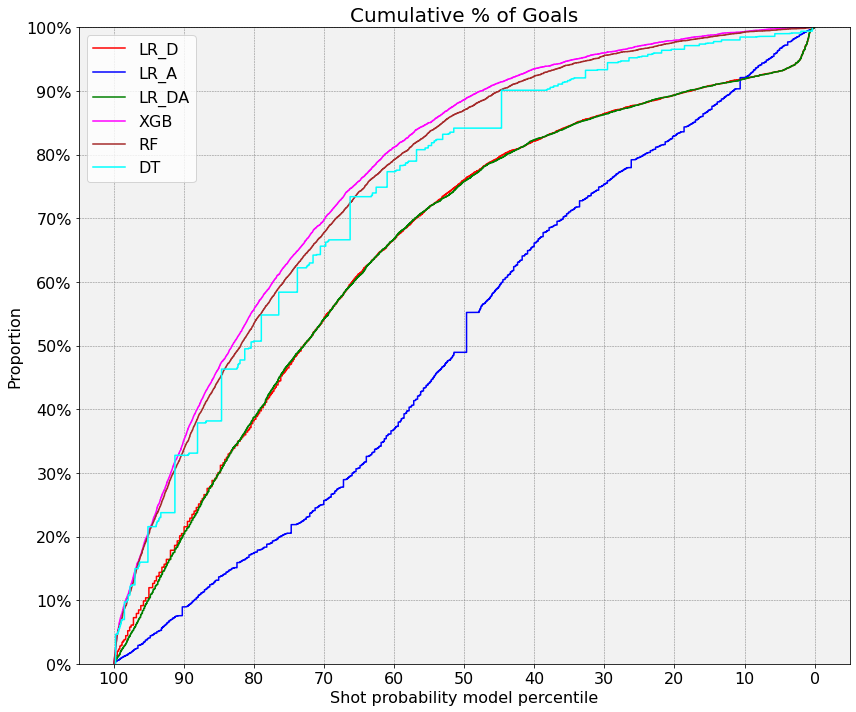

In [11]:
plot_cumulative_rate_all_feat(X_test, y_test)

In [12]:
def plot_calibration_all_feat(X_test, y_test):

    fig = plt.figure(figsize=(20, 20))
    gs = GridSpec(4, 3)

    ax_calibration_curve = fig.add_subplot(gs[:2, :2])
    
    model_list = ['LR_D', 'LR_A', 'LR_DA', 'XGB', 'RF', 'DT'] 
    model_color_list = ['red', 'blue', 'green', 'magenta', 'brown', 'cyan']
    
    for i, model in enumerate(model_list):
        y_test, y_pred, accuracy,  pred_probs = pred_model(X_test, y_test, model)
    
        
        y_test_is_goal = y_test['isGoal']
        probs_isgoal = pred_probs[:,1]
            
        plot_color = model_color_list[i]
        plot_label = model_list[i] 
           
        ax_display = CalibrationDisplay.from_predictions(y_test_is_goal,probs_isgoal, n_bins=50, 
                                                             ax=ax_calibration_curve, color=plot_color, label=plot_label)
   

    ax = plt.gca()
    ax.set_facecolor('0.95')
    ax_calibration_curve.grid()
    
    plt.title("Calibration plots", fontsize=20)
    plt.legend(loc=2,prop={'size': 16})
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.ylabel('Fraction of positives', fontsize=20)
    plt.xlabel('Mean predicted probability', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'7-1-1d_calibration_plots.png')
    plt.show()

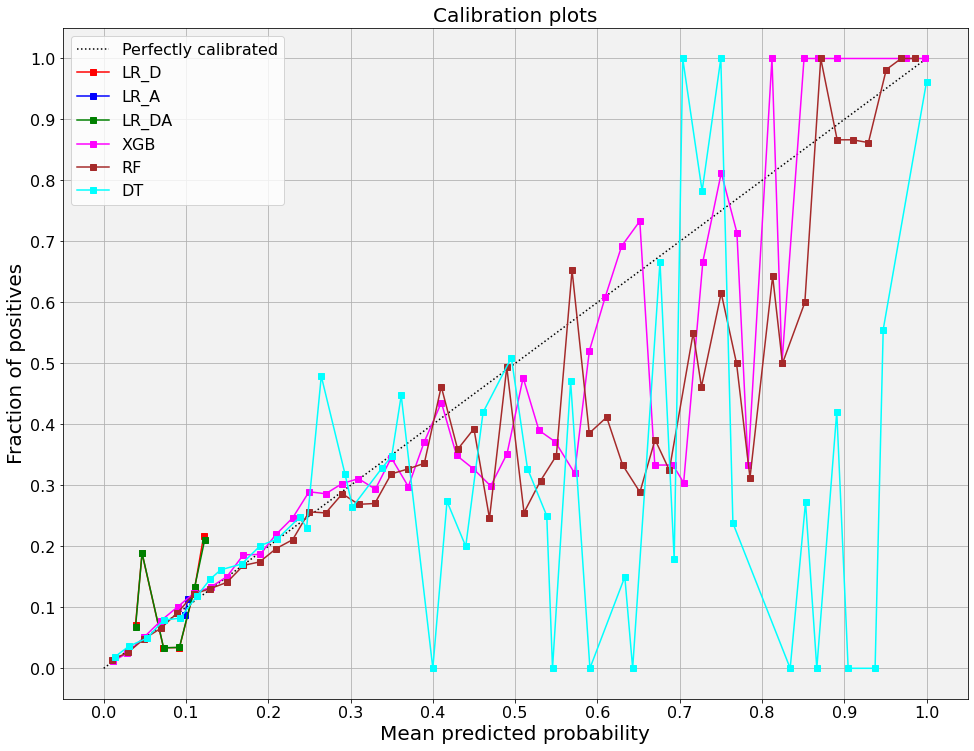

In [13]:
plot_calibration_all_feat(X_test, y_test)